# 2.4 Data Analysis: Rankings

In this notebook we  explore the characteristics of web trackers by analyzing the website ranking metrics of the web crawled data. We will be looking at:

- Page Rank
- Hubs & Authorities
- Eigenvector

### Dataset Configuration

In [1]:
data_name = 'firefox-run-01'

### Set Up

In [2]:
%load_ext autoreload
%autoreload 2

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [4]:
import sys
visualization_path = os.path.join('..', 'src', 'visualization')
sys.path.append(visualization_path)
import visualize

For this analysis, we import the labeled ```interim``` data from the csv file:

In [5]:
formatted_data_name = formatted_string = f"{data_name.split('-')[0].capitalize()} (Run {data_name.split('-')[2].zfill(2)})"

# Import and label the csv data
csv_file_path = os.path.join('..', 'data', 'interim', f"labeled-{data_name}.csv")
df = pd.read_csv(csv_file_path, index_col=False)

print(df.shape)
# print(df.columns)

# Set color palette for labels
palette={0: 'tab:blue', 1: 'tab:red'}

(25138, 64)


### Visualization

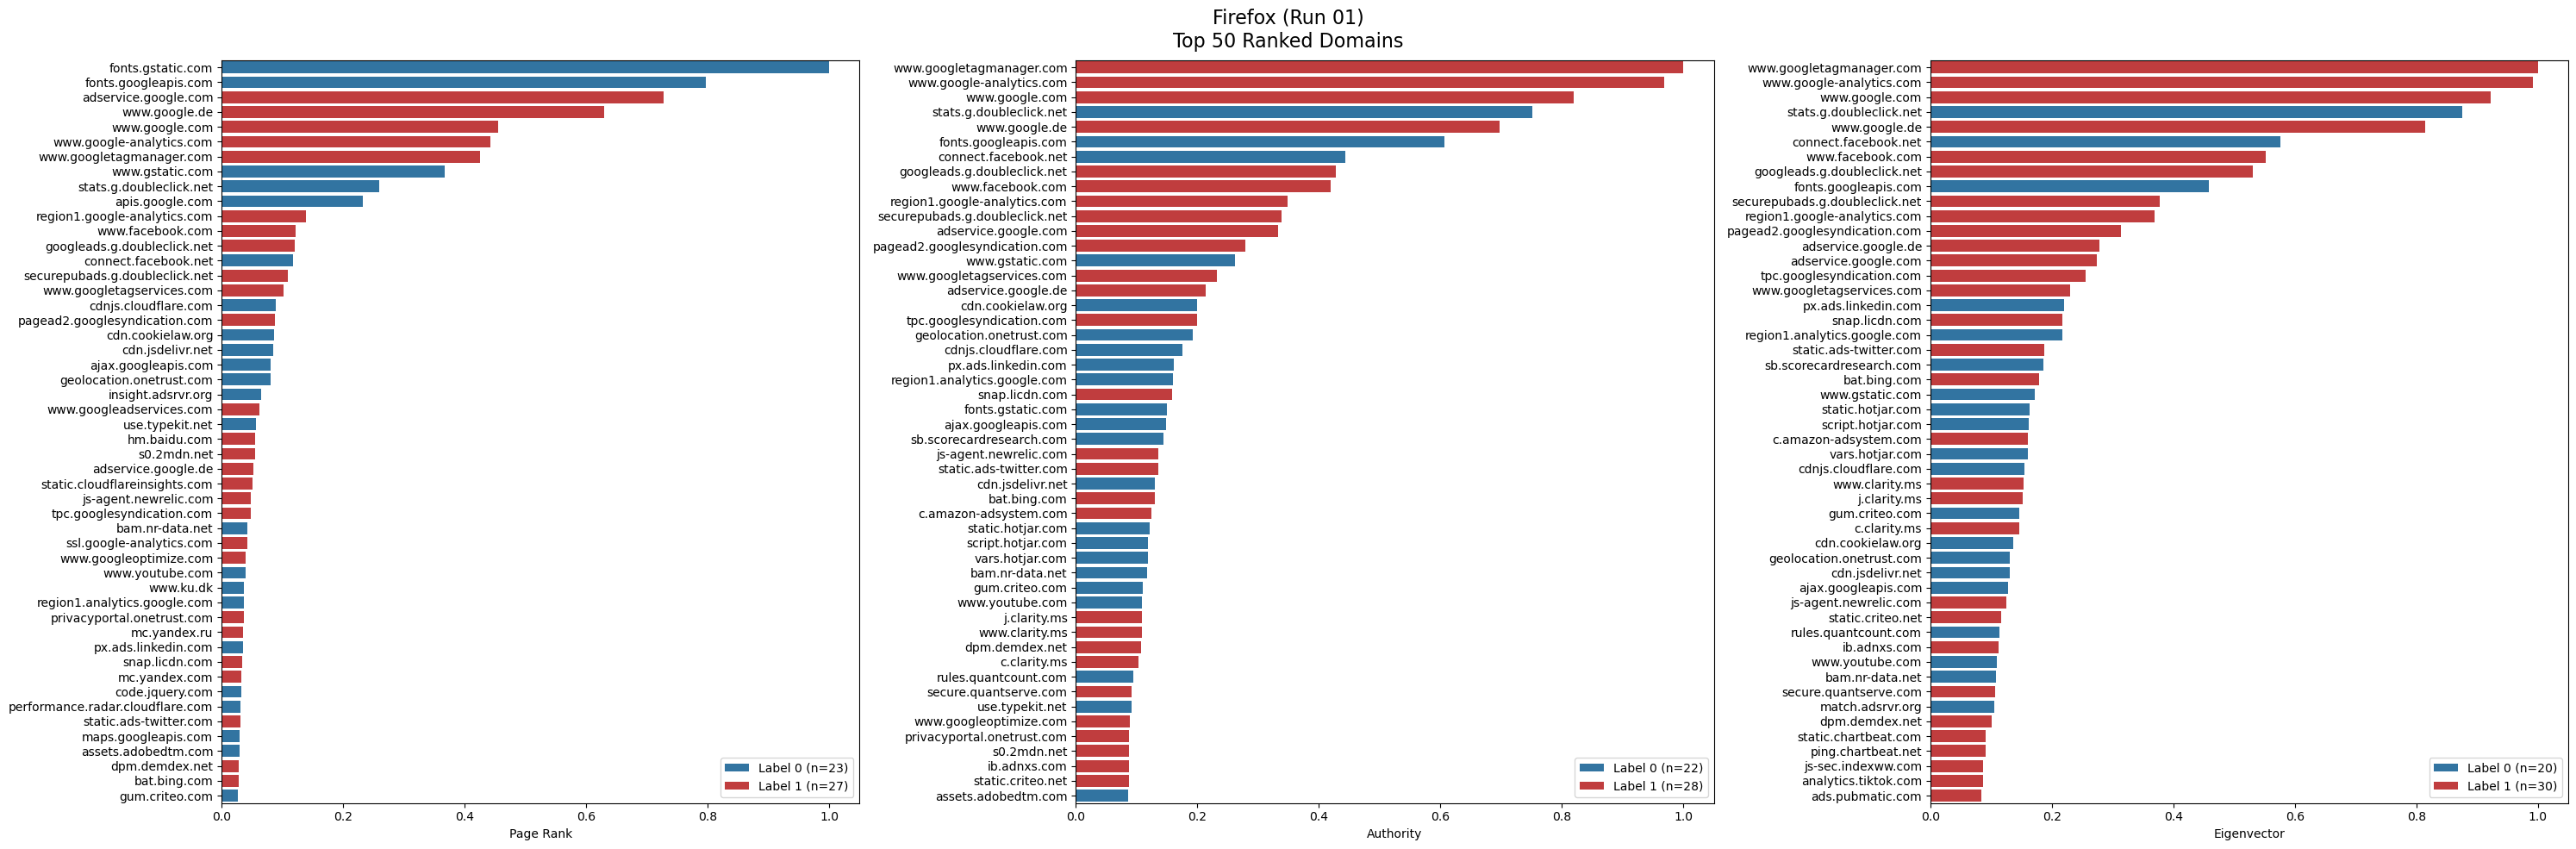

In [11]:
top_n = 50

# Normalize the metrics for comparison
df['normalized_pageranks'] = (df['pageranks'] - df['pageranks'].min()) / (df['pageranks'].max() - df['pageranks'].min())
df['normalized_eigencentrality'] = (df['eigencentrality'] - df['eigencentrality'].min()) / (df['eigencentrality'].max() - df['eigencentrality'].min())
df['normalized_authority'] = (df['Authority'] - df['Authority'].min()) / (df['Authority'].max() - df['Authority'].min())

# Set up a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(30, 10))

# Adjust each plot to use the normalized data and only the top entries
for i, metric in enumerate(['normalized_pageranks', 'normalized_eigencentrality', 'normalized_authority']):
    top = df.sort_values(metric, ascending=False).head(top_n)
    trackers_count = top[top['Label'] == 1].shape[0]
    non_trackers_count = top[top['Label'] == 0].shape[0]
    sns.barplot(data=top, y="Id", x=metric, hue='Label', palette={0: 'tab:blue', 1: 'tab:red'}, dodge=False, ax=axes[i])
    # Update legend to include counts
    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(handles=handles, 
                   labels=[f'Label 0 (n={non_trackers_count})', f'Label 1 (n={trackers_count})'], loc='lower right')
    axes[i].set_ylabel('')

# Adjust layout and labels
axes[0].set_xlabel('Page Rank')
axes[1].set_xlabel('Authority')
axes[2].set_xlabel('Eigenvector')
fig.suptitle(f'{formatted_data_name}\nTop 50 Ranked Domains', fontsize=16, verticalalignment='top')
fig.subplots_adjust(top=0.95)
plt.tight_layout()
plt.show()

visualize.save_report_figure(fig, data_name, 'rankings')
